In [6]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
X_train = np.load('horses_vs_monkeys_photos.npy')
y_train = np.load('horses_vs_monkeys_labels.npy')

In [8]:
# Split the dataset into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define a function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    import time
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test))
    train_time = time.time() - start_time
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    params = model.count_params()
    print('Test accuracy:', test_acc*100)
    
    # Visualize the cross-entropy loss and classification accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Cross-Entropy Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Classification Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    return train_time, train_loss, train_acc, test_acc, params

# Implement the VGG (1 block) model

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.4758 - loss: 2596.4690 - val_accuracy: 0.6000 - val_loss: 725.0720
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.7477 - loss: 450.2865 - val_accuracy: 0.4857 - val_loss: 629.2372
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.7297 - loss: 238.7764 - val_accuracy: 0.7143 - val_loss: 167.5319
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9031 - loss: 31.0270 - val_accuracy: 0.7143 - val_loss: 258.4662
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.9045 - loss: 34.5058 - val_accuracy: 0.7429 - val_loss: 165.0285
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9553 - loss: 24.5331 - val_accuracy: 0.6857 - val_loss: 122.7320
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9916 - loss: 4.0370 - val_accuracy: 0.7714 - val_loss: 99.4014
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.9623 - loss: 6.4917 - v

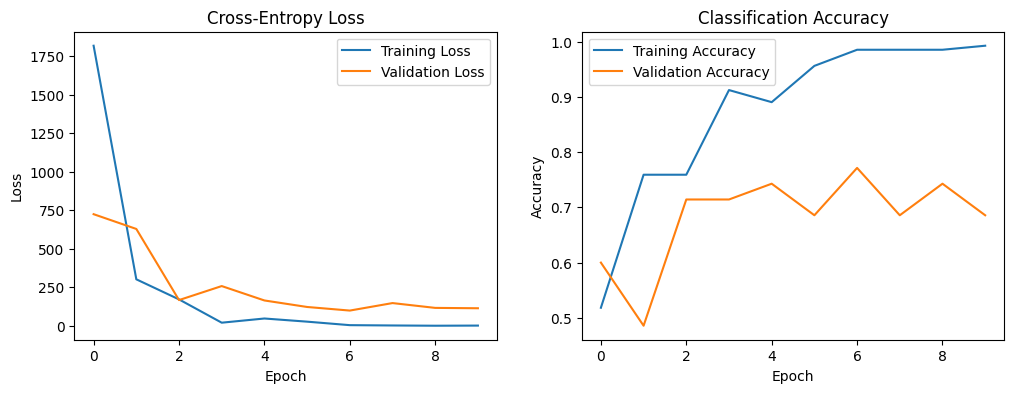

In [13]:

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model1_train_time, model1_train_loss, model1_train_acc, model1_test_acc, model1_params = train_and_evaluate(model1, X_train, y_train, X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.5567 - loss: 3366.8005 - val_accuracy: 0.6000 - val_loss: 277.0962
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5770 - loss: 414.2680 - val_accuracy: 0.5429 - val_loss: 165.9971
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.5966 - loss: 129.5143 - val_accuracy: 0.5429 - val_loss: 139.0266
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.6566 - loss: 45.4051 - val_accuracy: 0.6000 - val_loss: 79.2019
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.7703 - loss: 31.6249 - val_accuracy: 0.6286 - val_loss: 26.4298
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.8942 - loss: 13.7638 - val_accuracy: 0.6000 - val_loss: 62.0351
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.9432 - loss: 3.6772 - val_accuracy: 0.6571 - val_loss: 42.9406
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9696 - loss: 1.6666 - val_

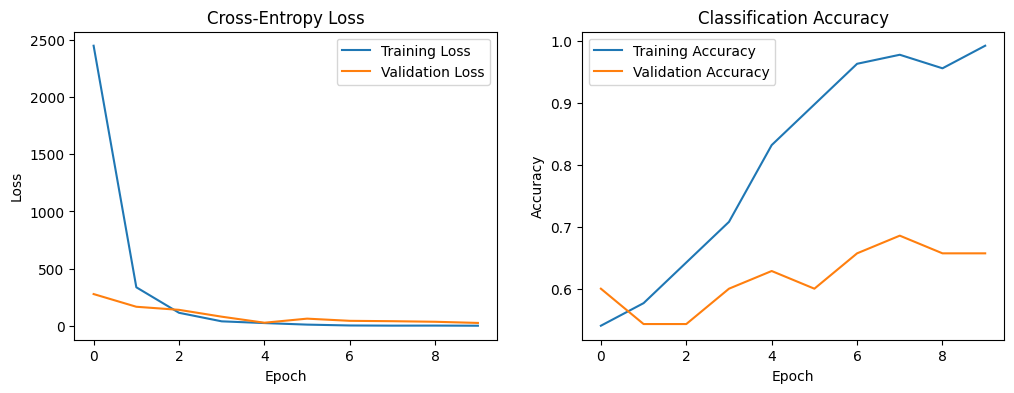

In [39]:

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model1_train_time, model1_train_loss, model1_train_acc, model1_test_acc, model1_params = train_and_evaluate(model1, X_train, y_train, X_test, y_test)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.4999 - loss: 2809.3169 - val_accuracy: 0.5143 - val_loss: 917.6261
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.4754 - loss: 711.8680 - val_accuracy: 0.7143 - val_loss: 64.5593
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.8933 - loss: 28.0271 - val_accuracy: 0.7143 - val_loss: 94.9550
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.9199 - loss: 15.6544 - val_accuracy: 0.6000 - val_loss: 67.1748
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9089 - loss: 7.9920 - val_accuracy: 0.6857 - val_loss: 56.3661
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9952 - loss: 0.2885 - val_accuracy: 0.6857 - val_loss: 76.6202
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.9637 - loss: 4.1870 - val_accuracy: 0.5714 - val_loss: 113.5584
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.9757 - loss: 2.4130 - val_accu

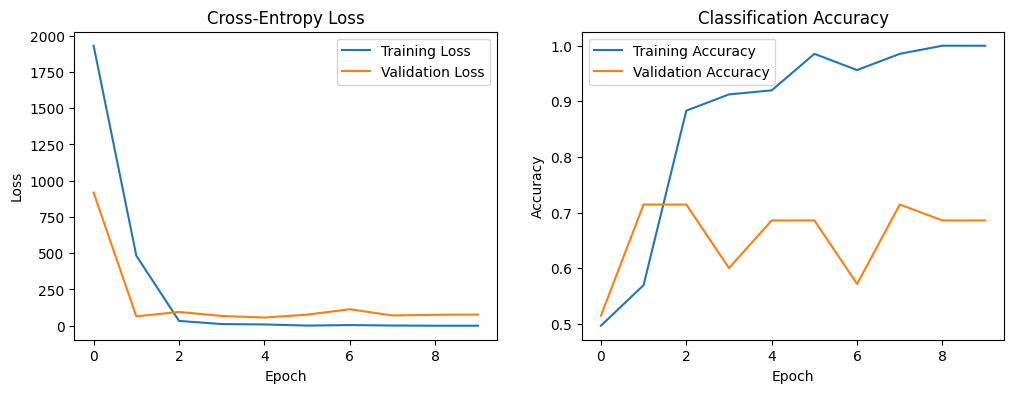

In [40]:

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model1_train_time, model1_train_loss, model1_train_acc, model1_test_acc, model1_params = train_and_evaluate(model1, X_train, y_train, X_test, y_test)

# Implement the VGG (3 blocks) model

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.5156 - loss: 172.6911 - val_accuracy: 0.4857 - val_loss: 2.2517
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.6969 - loss: 0.7909 - val_accuracy: 0.6571 - val_loss: 0.7483
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.7222 - loss: 0.5252 - val_accuracy: 0.7143 - val_loss: 2.5384
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.8500 - loss: 0.5926 - val_accuracy: 0.6000 - val_loss: 0.7983
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.9125 - loss: 0.2906 - val_accuracy: 0.7143 - val_loss: 0.5712
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.9635 - loss: 0.1380 - val_accuracy: 0.6286 - val_loss: 0.8601
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.9755 - loss: 0.0686 - val_accuracy: 0.6571 - val_loss: 0.7285
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.9914 - loss: 0.0906 - val_accuracy: 

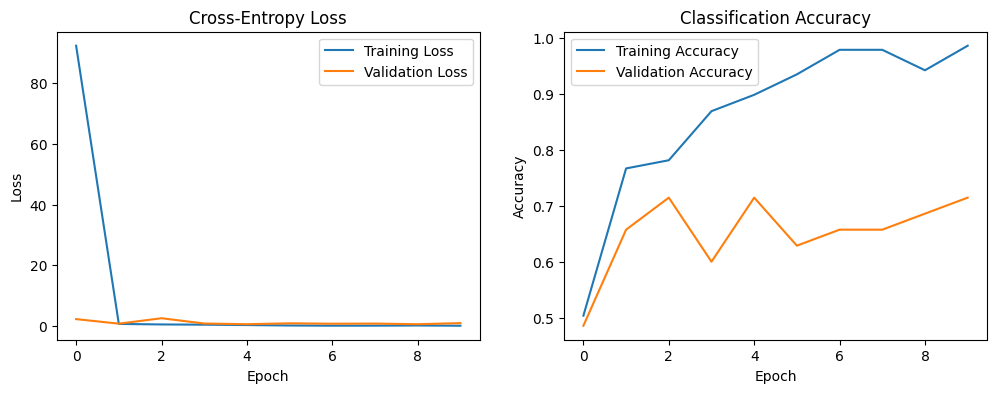

In [16]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model2_train_time, model2_train_loss, model2_train_acc, model2_test_acc, model2_params = train_and_evaluate(model2, X_train, y_train, X_test, y_test)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.4884 - loss: 363.5690 - val_accuracy: 0.4857 - val_loss: 2.0634
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.6419 - loss: 0.8616 - val_accuracy: 0.5429 - val_loss: 2.0759
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.7595 - loss: 0.7897 - val_accuracy: 0.6571 - val_loss: 0.6484
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.9018 - loss: 0.4007 - val_accuracy: 0.6000 - val_loss: 1.6785
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.8965 - loss: 0.2377 - val_accuracy: 0.6000 - val_loss: 0.6255
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.7820 - loss: 0.9130 - val_accuracy: 0.6000 - val_loss: 0.9757
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.7697 - loss: 0.7902 - val_accuracy: 0.5429 - val_loss: 2.8375
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.8501 - loss: 0.5767 - val_accuracy: 

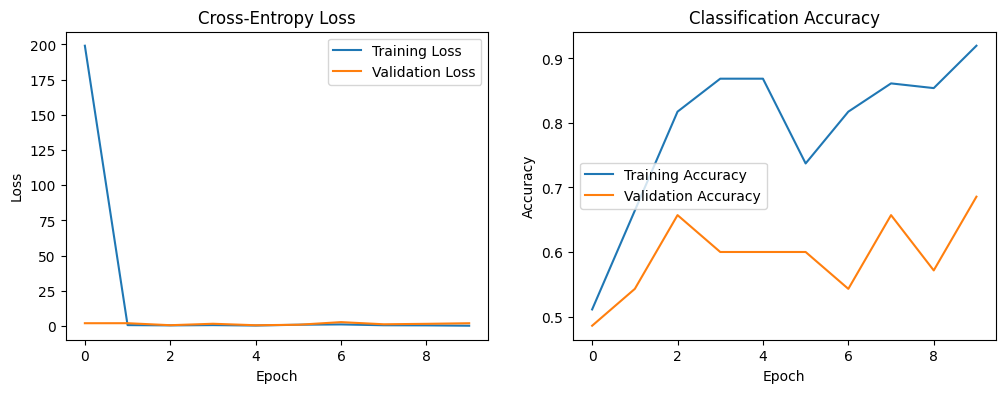

In [41]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model2_train_time, model2_train_loss, model2_train_acc, model2_test_acc, model2_params = train_and_evaluate(model2, X_train, y_train, X_test, y_test)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.4952 - loss: 530.4509 - val_accuracy: 0.6571 - val_loss: 0.6655
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.6240 - loss: 0.7582 - val_accuracy: 0.6286 - val_loss: 0.6001
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.8959 - loss: 0.4791 - val_accuracy: 0.6286 - val_loss: 0.7065
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.8507 - loss: 0.4345 - val_accuracy: 0.4286 - val_loss: 2.3915
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.7766 - loss: 1.1126 - val_accuracy: 0.5429 - val_loss: 0.8464
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.9337 - loss: 0.2277 - val_accuracy: 0.6286 - val_loss: 1.4839
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.9839 - loss: 0.0712 - val_accuracy: 0.5714 - val_loss: 1.5863
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.9393 - loss: 0.0974 - val_accuracy: 

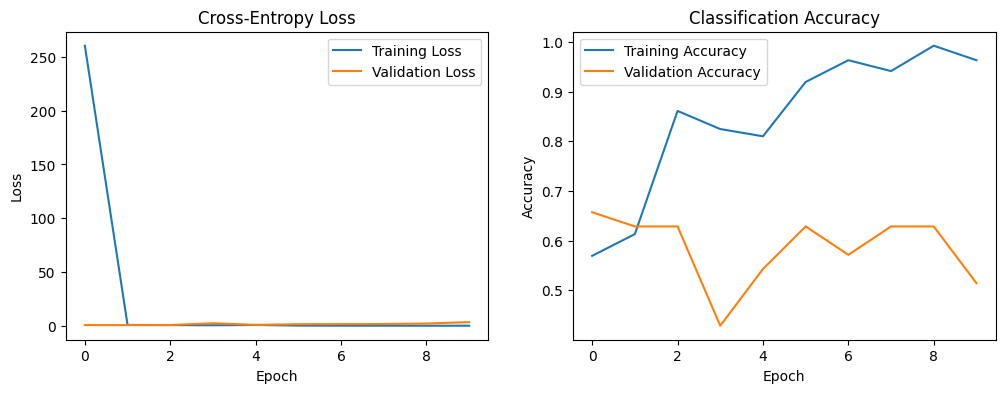

In [42]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model2_train_time, model2_train_loss, model2_train_acc, model2_test_acc, model2_params = train_and_evaluate(model2, X_train, y_train, X_test, y_test)

# Implement the VGG (3 blocks) with data augmentation

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.5663 - loss: 138.2171 - val_accuracy: 0.5429 - val_loss: 2.5559
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.7682 - loss: 0.7520 - val_accuracy: 0.6857 - val_loss: 0.8511
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.8866 - loss: 0.2988 - val_accuracy: 0.7714 - val_loss: 0.8629
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.9403 - loss: 0.1574 - val_accuracy: 0.5714 - val_loss: 2.4468
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - accuracy: 0.9189 - loss: 0.2922 - val_accuracy: 0.7143 - val_loss: 0.9358
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - accuracy: 0.9531 - loss: 0.1190 - val_accuracy: 0.6571 - val_loss: 1.5666
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - accuracy: 0.9789 - loss: 0.0815 - val_accuracy: 0.7143 - val_loss: 2.2029
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.9130 - loss: 0.4573 - val_accuracy: 

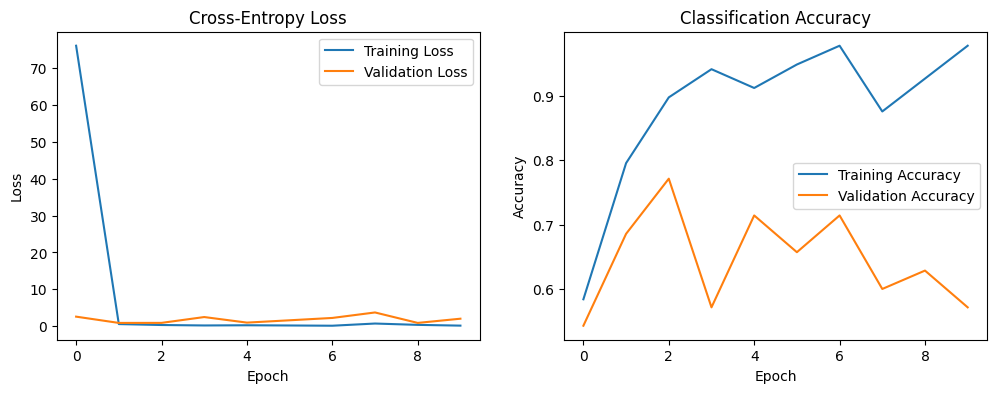

In [19]:

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model3_train_time, model3_train_loss, model3_train_acc, model3_test_acc, model3_params = train_and_evaluate(model3, X_train, y_train, X_test, y_test)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - accuracy: 0.4369 - loss: 278.5289 - val_accuracy: 0.5143 - val_loss: 1.8621
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.5833 - loss: 2.5031 - val_accuracy: 0.5714 - val_loss: 0.8575
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.6756 - loss: 0.6162 - val_accuracy: 0.6000 - val_loss: 0.6288
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.9139 - loss: 0.2777 - val_accuracy: 0.6571 - val_loss: 1.3758
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.9609 - loss: 0.2211 - val_accuracy: 0.6857 - val_loss: 0.8627
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.9823 - loss: 0.0835 - val_accuracy: 0.6286 - val_loss: 2.7951
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.8804 - loss: 0.3045 - val_accuracy: 0.6286 - val_loss: 0.8754
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.9241 - loss: 0.2004 - val_accuracy: 

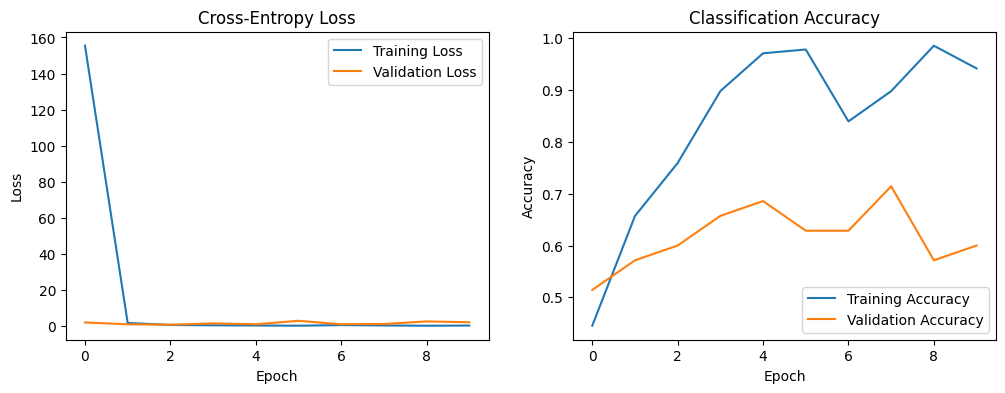

In [43]:

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model3_train_time, model3_train_loss, model3_train_acc, model3_test_acc, model3_params = train_and_evaluate(model3, X_train, y_train, X_test, y_test)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.4620 - loss: 461.9283 - val_accuracy: 0.5143 - val_loss: 1.3662
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.7617 - loss: 0.5563 - val_accuracy: 0.5714 - val_loss: 1.1056
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.8739 - loss: 0.3218 - val_accuracy: 0.6571 - val_loss: 1.0729
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.9551 - loss: 0.1687 - val_accuracy: 0.6000 - val_loss: 1.3284
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.9884 - loss: 0.0472 - val_accuracy: 0.6000 - val_loss: 0.7571
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 1.0000 - loss: 0.0207 - val_accuracy: 0.7143 - val_loss: 0.8407
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 1.0000 - loss: 0.0082 - val_accuracy: 0.6857 - val_loss: 0.9489
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 

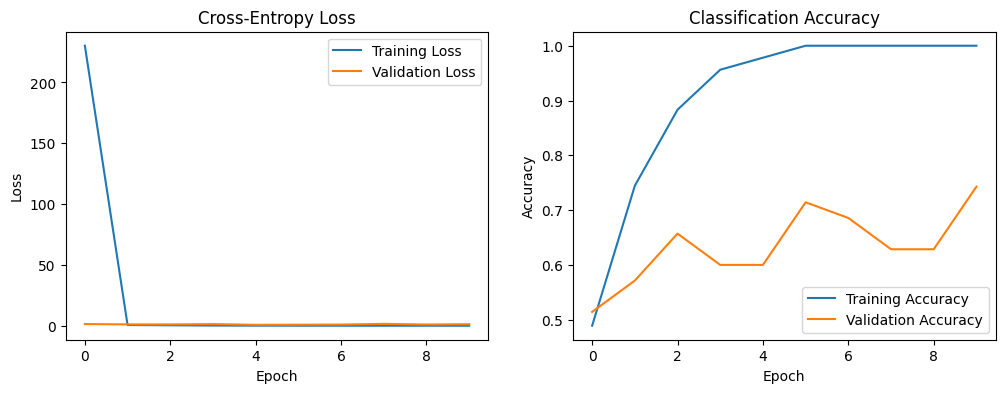

In [44]:

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model3_train_time, model3_train_loss, model3_train_acc, model3_test_acc, model3_params = train_and_evaluate(model3, X_train, y_train, X_test, y_test)

# Implement the transfer learning with VGG16 (tuning all layers)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.5104 - loss: 92.4039 - val_accuracy: 0.3429 - val_loss: 0.7532
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.5140 - loss: 0.8250 - val_accuracy: 0.4857 - val_loss: 0.7241
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - accuracy: 0.5047 - loss: 0.7301 - val_accuracy: 0.5429 - val_loss: 0.7058
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step - accuracy: 0.4801 - loss: 0.7005 - val_accuracy: 0.5714 - val_loss: 0.7045
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step - accuracy: 0.5283 - loss: 0.6924 - val_accuracy: 0.4857 - val_loss: 0.7623
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step - accuracy: 0.4947 - loss: 0.7264 - val_accuracy: 0.5714 - val_loss: 0.6959
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.5151 - loss: 0.6933 - val_accuracy: 0.2857 - val_loss: 0.7020
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - accuracy: 0.5442 - loss: 0.6896 - val_accuracy: 0.4286 - val_loss

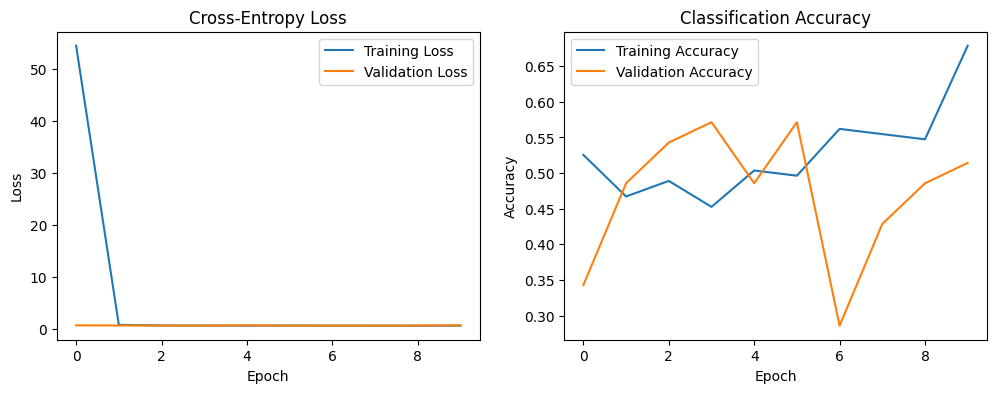

In [22]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load the VGG16 model without pre-trained weights
model4_base = VGG16(include_top=False, input_shape=(200, 200, 3), weights=None)
for layer in model4_base.layers:
    layer.trainable = True
# Create your model architecture
model4 = Sequential([
    model4_base,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Load the downloaded weights file
weights_path = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Load the weights into the corresponding layers of the model
model4_base.load_weights(weights_path, by_name=True)

# Compile the model
model4.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Continue with training and evaluation...
model4_train_time, model4_train_loss, model4_train_acc, model4_test_acc, model4_params = train_and_evaluate(model4, X_train, y_train, X_test, y_test)


# Implement the transfer learning with VGG16 (tuning only final layers)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.9007 - loss: 0.3349 - val_accuracy: 0.5143 - val_loss: 1.9964
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.9334 - loss: 0.2368 - val_accuracy: 0.5143 - val_loss: 1.8274
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8744 - loss: 0.2381 - val_accuracy: 0.6000 - val_loss: 2.9703
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.8086 - loss: 0.5608 - val_accuracy: 0.5714 - val_loss: 0.8898
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.7095 - loss: 1.2725 - val_accuracy: 0.6286 - val_loss: 0.6435
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 70s 5s/step - accuracy: 0.5726 - loss: 1.2026 - val_accuracy: 0.6286 - val_loss: 0.8504
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 66s 5s/step - accuracy: 0.7276 - loss: 0.5823 - val_accuracy: 0.4857 - val_loss: 0.8395
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.6283 - loss: 0.6520 - val_accuracy: 0.5429 - val_loss:

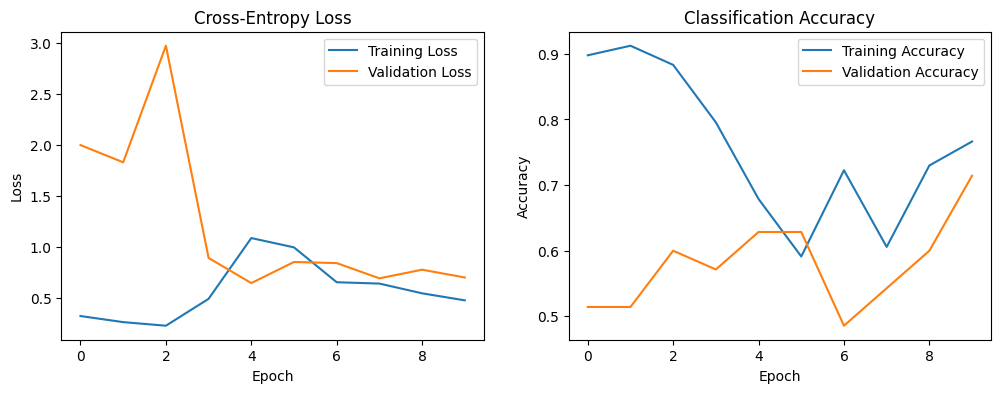

In [25]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load the VGG16 model without pre-trained weights
model5_base = VGG16(include_top=False, input_shape=(200, 200, 3), weights=None)
for layer in model5_base.layers:
    layer.trainable = False
# Create your model architecture
model5 = Sequential([
    model5_base,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Load the downloaded weights file
weights_path = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Load the weights into the corresponding layers of the model
model5_base.load_weights(weights_path, by_name=True)

# Compile the model
model5.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Continue with training and evaluation...
model5_train_time, model5_train_loss, model5_train_acc, model5_test_acc, model5_params = train_and_evaluate(model4, X_train, y_train, X_test, y_test)

# Create the comparison table

In [48]:
comparison_table = pd.DataFrame({
    'Model': ['Model_1', 'Model_2', 'Model_3', 'Model_4', 'Model_5'],
    'Training Time': [model1_train_time, model2_train_time, model3_train_time, model4_train_time, model5_train_time],
    'Training Loss': [model1_train_loss, model2_train_loss, model3_train_loss, model4_train_loss, model5_train_loss],
    'Training Accuracy': [model1_train_acc, model2_train_acc, model3_train_acc, model4_train_acc, model5_train_acc],
    'Testing Accuracy': [model1_test_acc, model2_test_acc, model3_test_acc, model4_test_acc, model5_test_acc],
})

print(comparison_table)

     Model  Training Time  Training Loss  Training Accuracy  Testing Accuracy
0  Model_1      12.673406   6.421764e-21           1.000000          0.685714
1  Model_2      20.533083   1.125847e-01           0.978102          0.514286
2  Model_3      20.603056   2.689335e-04           1.000000          0.742857
3  Model_4     540.802857   6.277093e-01           0.613139          0.514286
4  Model_5     511.013600   3.835509e-01           0.846715          0.714286


# Set up Tensorboard

In [38]:
from tensorboard import program
tb = program.TensorBoard()
tb.configure(argv=[None, '--logdir', 'logs'])
url = tb.launch()
print(f'Tensorboard is running at {url}')

# Log the training loss, training accuracy, and testing accuracy
import tensorflow as tf
log_dir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Tensorboard is running at http://localhost:6011/
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 1.0000 - loss: 0.0000e+00

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.6857 - val_loss: 96.6490
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.6857 - val_loss: 96.6490
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.6857 - val_loss: 96.6490
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.6857 - val_loss: 96.6490
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.6857 - val_loss: 96.6490
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.6857 - val_loss: 96.6490
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.6857 - val_loss: 96.6490
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.6857 - val_l

In [40]:
model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.9410 - loss: 0.1225

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 703ms/step - accuracy: 0.9411 - loss: 0.1267 - val_accuracy: 0.6591 - val_loss: 2.8047
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 748ms/step - accuracy: 0.9816 - loss: 0.1383 - val_accuracy: 0.5909 - val_loss: 3.1859
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 721ms/step - accuracy: 0.9711 - loss: 0.0759 - val_accuracy: 0.6136 - val_loss: 4.2884
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 629ms/step - accuracy: 0.9858 - loss: 0.0372 - val_accuracy: 0.5909 - val_loss: 5.5216
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 718ms/step - accuracy: 0.9859 - loss: 0.0623 - val_accuracy: 0.6136 - val_loss: 4.1765
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 799ms/step - accuracy: 0.9354 - loss: 0.2866 - val_accuracy: 0.6364 - val_loss: 6.2351
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 660ms/step - accuracy: 0.9774 - loss: 0.1713 - val_accuracy: 0.5909 - val_loss: 4.8536
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 669ms/step - accuracy: 0.9686 - loss: 0.0825 - val_accuracy: 0.5227 - val_loss: 2.6999
Epo

In [41]:

model3.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.6212 - loss: 0.6838

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 697ms/step - accuracy: 0.6189 - loss: 0.6837 - val_accuracy: 0.6818 - val_loss: 3.4360
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 770ms/step - accuracy: 0.6877 - loss: 0.6733 - val_accuracy: 0.6818 - val_loss: 4.1871
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 785ms/step - accuracy: 0.6398 - loss: 0.6769 - val_accuracy: 0.6591 - val_loss: 4.3444
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 748ms/step - accuracy: 0.7048 - loss: 0.6329 - val_accuracy: 0.7045 - val_loss: 4.8425
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 800ms/step - accuracy: 0.7139 - loss: 0.6211 - val_accuracy: 0.7045 - val_loss: 5.6656
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 741ms/step - accuracy: 0.7156 - loss: 0.5984 - val_accuracy: 0.6818 - val_loss: 6.0859
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 738ms/step - accuracy: 0.7313 - loss: 0.5736 - val_accuracy: 0.6818 - val_loss: 6.2780
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 763ms/step - accuracy: 0.7471 - loss: 0.5467 - val_accuracy: 0.7500 - val_loss: 5.5524
Epo

In [42]:

model4.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/10
2/6 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 1.0000 - loss: 2.6982e-11

6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 1.0000 - loss: 2.4772e-11 - val_accuracy: 0.9091 - val_loss: 3.3093
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 1.0000 - loss: 1.7152e-11 - val_accuracy: 0.9091 - val_loss: 3.3092
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 1.0000 - loss: 2.4616e-11 - val_accuracy: 0.9091 - val_loss: 3.3092
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 1.0000 - loss: 8.1776e-12 - val_accuracy: 0.9091 - val_loss: 3.3092
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 1.0000 - loss: 2.4615e-11 - val_accuracy: 0.9091 - val_loss: 3.3092
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 30s 5s/step - accuracy: 1.0000 - loss: 8.2800e-12 - val_accuracy: 0.9091 - val_loss: 3.3092
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 29s 5s/step - accuracy: 1.0000 - loss: 8.1533e-12 - val_accuracy: 0.9091 - val_loss: 3.3092
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - accuracy: 1.0000 - loss: 8.1605e-12 - val_accuracy: 0.9091 - val_

In [45]:

model5.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.3438 - loss: 10.4400

6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.5083 - loss: 26.2110 - val_accuracy: 0.9091 - val_loss: 8.1873
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.9585 - loss: 0.8193 - val_accuracy: 0.9318 - val_loss: 1.1822
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.9334 - loss: 1.7460 - val_accuracy: 0.9318 - val_loss: 0.8499
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 1.0000 - loss: 1.8602e-05 - val_accuracy: 0.9545 - val_loss: 1.5453
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.9983 - loss: 0.0030 - val_accuracy: 0.9545 - val_loss: 2.5173
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 1.0000 - loss: 3.9144e-09 - val_accuracy: 0.9318 - val_loss: 2.6817
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 1.0000 - loss: 2.7084e-11 - val_accuracy: 0.9318 - val_loss: 2.7935
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 1.0000 - loss: 5.2898e-11 - val_accuracy: 0.9318 - val_loss: 2.8575
Ep

# Create a MLP model with a comparable number of parameters as VGG16 and compare your performance with the other models in the table.

In [46]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
print("Number of parameters in VGG16:", vgg16.count_params())

Number of parameters in VGG16: 14714688


In [49]:
# Create the MLP model
mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=(200, 200, 3)))
mlp_model.add(Dense(128, activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(28, activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(1, activation='sigmoid'))
mlp_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Count the number of parameters in the MLP model
print("Number of parameters in MLP model:", mlp_model.count_params())

Number of parameters in MLP model: 15370233


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.4739 - loss: 8204.2344 - val_accuracy: 0.5143 - val_loss: 1084.4741
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.4666 - loss: 8291.5410 - val_accuracy: 0.4857 - val_loss: 163.0921
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5682 - loss: 4797.1436 - val_accuracy: 0.5143 - val_loss: 333.2094
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5274 - loss: 3724.7021 - val_accuracy: 0.4857 - val_loss: 146.4733
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.4994 - loss: 2156.4329 - val_accuracy: 0.6571 - val_loss: 10.8024
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.4479 - loss: 146.6125 - val_accuracy: 0.5143 - val_loss: 0.6762
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5204 - loss: 5.7817 - val_accuracy: 0.5143 - val_loss: 0.6762
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.4548 - loss: 2.2045

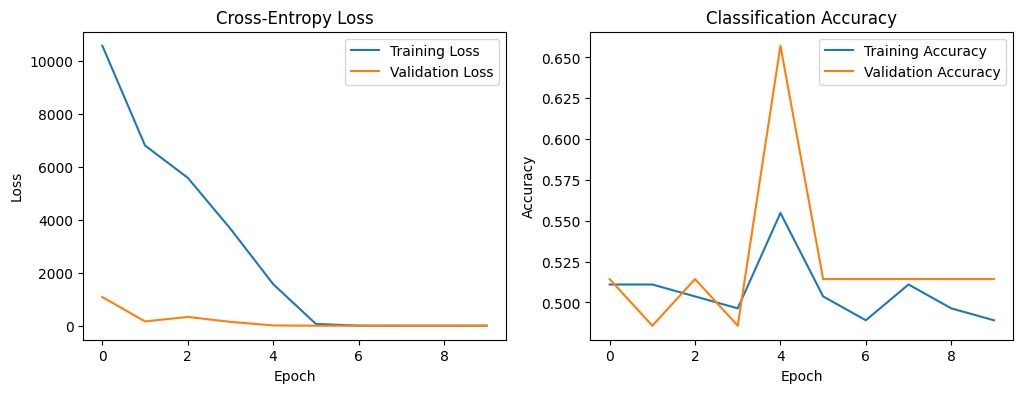

In [50]:
mlp_train_time, mlp_train_loss, mlp_train_acc, mlp_test_acc, mlp_params = train_and_evaluate(mlp_model, X_train, y_train, X_test, y_test)

In [37]:
# Save the complete comparison table
comparison_table = pd.DataFrame({
    'Model': ['VGG (1 block)', 'VGG (3 blocks)', 'VGG (3 blocks) with data augmentation', 'Transfer learning with VGG16 (tuning all layers)', 'Transfer learning with VGG16 (tuning only final layers)', 'MLP'],
    'Training Time': [model1_train_time, model2_train_time, model3_train_time, model4_train_time, model5_train_time, mlp_train_time],
    'Training Loss': [model1_train_loss, model2_train_loss, model3_train_loss, model4_train_loss, model5_train_loss, mlp_train_loss],
    'Training Accuracy': [model1_train_acc, model2_train_acc, model3_train_acc, model4_train_acc, model5_train_acc, mlp_train_acc],
    'Testing Accuracy': [model1_test_acc, model2_test_acc, model3_test_acc, model4_test_acc, model5_test_acc, mlp_test_acc],
    'Number of Parameters': [model1_params, model2_params, model3_params, model4_params, model5_params, mlp_params]
})

print(comparison_table)

                                               Model  Training Time  \
0                                      VGG (1 block)      12.629868   
1                                     VGG (3 blocks)      20.791522   
2              VGG (3 blocks) with data augmentation      22.636529   
3   Transfer learning with VGG16 (tuning all layers)     540.802857   
4  Transfer learning with VGG16 (tuning only fina...     511.013600   
5                                                MLP       6.807912   

   Training Loss  Training Accuracy  Testing Accuracy  Number of Parameters  
0       0.000000           1.000000          0.685714              20073473  
1       0.040844           0.992701          0.714286               8760641  
2       0.039579           1.000000          0.571429               8760641  
3       0.627709           0.613139          0.514286              17074241  
4       0.383551           0.846715          0.714286              17074241  
5       0.689045           0.51094